['D4', 'HydrogenSulfide', 'o-Xylene', 'R125', 'IsoButane', 'MDM', 'R245ca', 'Cyclopentane', 'p-Xylene', 'ParaHydrogen', 'MethylPalmitate', 'R41', 'SulfurDioxide', 'R236EA', 'R113', 'NitrousOxide', 'n-Propane', 'HeavyWater', 'Propylene', 'R143a', 'Xenon', 'R40', 'R1243zf', 'CycloHexane', 'R21', 'CarbonMonoxide', 'Oxygen', 'DiethylEther', 'R1234yf', 'R124', 'MD3M', 'D5', 'CarbonylSulfide', 'Ammonia', 'Fluorine', 'CycloPropane', 'R407C', 'CarbonDioxide', 'MD4M', 'Neon', 'R115', 'R123', 'R236FA', 'Ethane', 'n-Decane', 'MM', 'RC318', 'R410A', 'R245fa', 'n-Octane', 'MD2M', 'Isohexane', 'n-Pentane', 'DimethylEther', 'IsoButene', 'Isopentane', 'R114', 'R11', 'SES36', 'Water', 'EthyleneOxide', '1-Butene', 'trans-2-Butene', 'R142b', 'n-Heptane', 'Methane', 'n-Hexane', 'R12', 'R365MFC', 'MethylOleate', 'Deuterium', 'DimethylCarbonate', 'Novec649', 'MethylStearate', 'R32', 'R134a', 'n-Undecane', 'Helium', 'Toluene', 'R1233zd(E)', 'Hydrogen', 'R161', 'R227EA', 'R13', 'Methanol', 'ParaDeuterium', 'R

FileNotFoundError: [Errno 2] No such file or directory: 'PNG/T6_diagramme_Ph_coolprop_Water.png'

<Figure size 2160x1512 with 0 Axes>

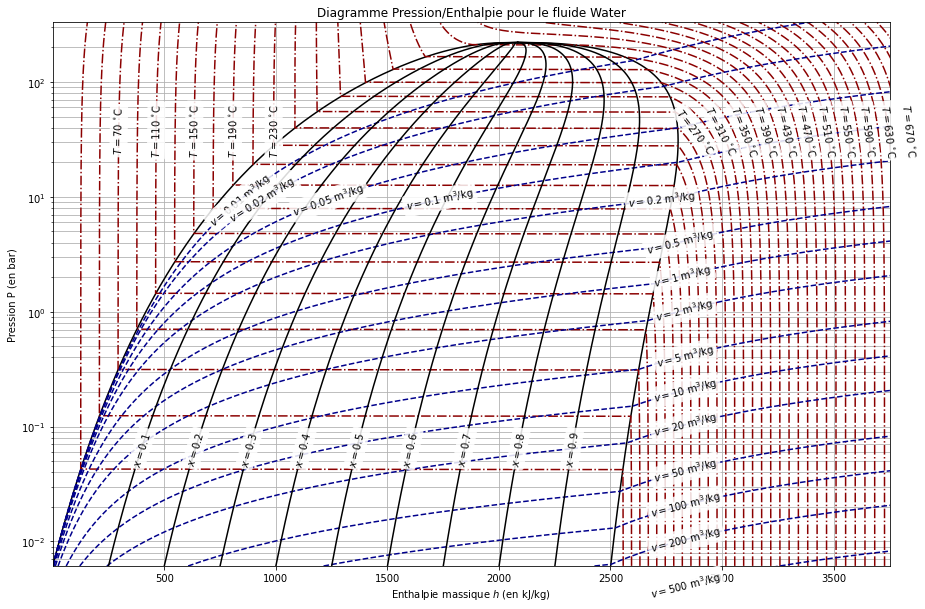

In [1]:


# Sauf mention explicite du contraire par la suite, ce travail a été fait par 
# Jean-Julien Fleck, professeur de physique/IPT en PCSI1 au lycée Kléber. 
# Vous êtes libres de le réutiliser et de le modifier selon vos besoins.



"""
Fabrication d'un diagramme (P,h) avec les iso-choses adéquates.
Reprise complète car c'est galère de se baser sur le Ph_plot fourni par CoolProp.
"""

import numpy as np               # Les outils mathématiques
import CoolProp.CoolProp as CP   # Les outils thermodynamiques
import CoolProp.Plots as CPP     # Les outils thermographiques
import matplotlib.pyplot as plt  # Les outils graphiques


print(CP.FluidsList())           # Pour regarder les fluides disponibles
fluide= 'Water'                  # Le choix du fluide
Plogscale = True                 # Axe en pression logarithmique ?
iso_T = True                    # Veut-on des isothermes ?
iso_x = True                    # et les isotitres ?
iso_s = False                    # et les isentropiques ?
iso_v = True                     # et les isochores ?

# Les unités dans lesquelles on veut travailler (voir CONVERSION)
unitP = 'bar'
unitH = 'kJ'
unitT = 'celsius'

# Les utilitaires pour les conversions
if unitT == 'celsius':
    def kelvin(t): return t + 273.15  # Conversion en kelvin
    def celsius(T):return T - 273.15  # Conversion en celsius
else: # Si on reste en kelvin, les transformations sont l'identité
    def kelvin(t): return t
    def celsius(t): return t
CONVERSION = {'bar': 1e5, 'kPa': 1e3, 'Pa': 1, 'kJ': 1e3, 'J': 1}

# Les limites du graphique (en unités du graphique)
# On part de la pression triple (+ 1Pa pour être sûr)
Pmin = (CP.PropsSI(fluide,'ptriple')+1)/CONVERSION[unitP]
# On va jusqu'à un peu au-dessus du point critique
Pmax = (1.5*CP.PropsSI(fluide,'pcrit'))/CONVERSION[unitP]
# On prend l'enthalpie à gauche un peu sous le point triple côté liquide
Hmin = 0.9*CP.PropsSI('H','P',Pmin*CONVERSION[unitP],'Q',0,fluide)/CONVERSION[unitH]
# et l'enthalpie à droite un peu au-dessus de celle du point triple côté gaz
Hmax = 1.5*CP.PropsSI('H','P',Pmin*CONVERSION[unitP],'Q',1,fluide)/CONVERSION[unitH]

# Données pour les isothermes (on veut une représentation sympa en celsius en pratique)
dT = 20                                 # Incrément de températures
Ttriple = CP.PropsSI(fluide,'Ttriple')  # Valeur de la température au point triple
Tcrit = CP.PropsSI(fluide,'Tcrit')      # et au point critique
# Par défaut, on part près du point triple avec une valeur arrondi à une 
# dizaine en celsius.
Tmin = kelvin(int(celsius(Ttriple)/10)*10 + 10) + 20
val_T = np.arange(Tmin,1.5*Tcrit,dT)    # et on dépasse un peu le point critique
T_to_show = list(range(2,len(val_T),2)) # Sélection des T à afficher (mettre None pour toutes)

# Données pour les isotitres
val_x = np.linspace(0.1,0.9,9)          # Les valeurs des isotitres
x_to_show = None

# Données pour les isentropiques
ds = 0.5e3
striple_x0 = CP.PropsSI('S','Q',0,'T',Ttriple,fluide) # Entropie triple à gauche
striple_x1 = CP.PropsSI('S','Q',1,'T',Ttriple,fluide) # Entropie triple à droite
val_s = np.arange(striple_x0,striple_x1*1.2,ds)       # Valeurs à tracer
s_to_show = list(range(2,len(val_s),2))               # et à afficher

# Données pour les isochores (réparties de manière logarithmique par défaut)
vcrit = 1/CP.PropsSI(fluide,'rhocrit')                 # Volume massique critique
exp_min = int(np.floor(np.log10(vcrit)))+1             # Puissance de 10 proche
vtriple_x1 = 1/CP.PropsSI('D','Q',1,'T',Ttriple,fluide)# Point triple à droite
exp_max = int(np.ceil(np.log10(vtriple_x1)))-1         # Puissance de 10 proche
# Les valeurs à prendre
val_v = [a * 10**b for a in [1,2,5] for b in range(exp_min,exp_max+1)]
v_to_show = None                                       # On les affiche toutes.

# Quelques constantes
UNITS = {'T': 'K', 'Q': '', 'S': 'kJ/K/kg', 'V': 'm$^3$/kg'}
if unitT == 'celsius': UNITS['T'] = '$^{\circ}$C'
LABEL = {'T': 'T', 'Q': 'x','S': 's', 'V': 'v'}
COLOR_MAP = {'T': 'Darkred',
             'P': 'DarkCyan',
             'H': 'DarkGreen',
             'V': 'DarkBlue',
             'S': 'DarkOrange',   
             'Q': 'black'}
LINE_STYLE = {'T': '-.',
             'V': '--',
             'S': ':',   
             'Q': '-'}
          

# On prépare un format pour impression sur A3 ou presque (dimensions en pouces)
plt.figure(figsize=(30,21))

def place_label(x,y,label,indice=None,cotan=False,color='k'):
    """ Routine qui se débrouille pour mettre un label semi-transparent au 
    niveau de la courbe données par ses coordonnées x et y. Si on sait que le 
    label sera presque vertical avec possibilité de dépasser 90°, on peut 
    utiliser cotan=True pour corriger (considération purement esthétique). 
    'indice' correspond à la position dans les tableaux x et y où devra 
    s'afficher le label demandé. """
    print(x[0],y[0],label) # un peu de feedback pour savoir ce qu'on calcule
    N = len(x)//2          # Emplacement par défaut
    if indice: N=indice    # sauf si l'utilisateur impose la valeur
    xi,xf = plt.xlim()     # Les limites en x du graphe
    yi,yf = plt.ylim()     # Pareil en y
    Xsize = xf - xi        # La largeur
    # Pour la hauteur et la pente, cela dépend si les ordonnées sont en repère 
    # logarithmique ou non.
    if Plogscale:
        Ysize = np.log10(yf) - np.log10(yi)
        a = (np.log10(y[N+1])-np.log10(y[N-1]))/(x[N+1]-x[N-1]) * Xsize/Ysize
    else:
        Ysize = yf - yi
        a = (y[N+1]-y[N-1])/(x[N+1]-x[N-1]) * Xsize/Ysize
    bbox = plt.gca().get_window_extent() # Récupération de la taille de la figure
    a *= bbox.height / bbox.width        # Correction de la pente avec la taille 
    rot = np.degrees(np.arctan(a))       # Calcul de l'angle de rotation
    if cotan:                            # Si on dépasse la verticale
        rot = 90 - np.degrees(np.arctan(1/a))
    t = plt.text(x[N],y[N],label,        # On met le texte au bon endroit
    ha='center',va='center',color=color,rotation = str(rot)) # Avec la bonne rotation
    # On se débrouille pour que la "boîte" d'écriture soit semi-transparente
    #t.set_bbox(dict(facecolor='w',edgecolor='None',alpha=0.8))
    t.set_bbox(dict(boxstyle="round",facecolor='w',edgecolor='None',alpha=0.85))

def fait_isolignes(type,valeurs,position=None,nb_points=1000,to_show=None,round_nb = 0 ):
    """ S'occupe du calcul et du tracé des isolignes. """
    if not(to_show):                        # Valeurs par défauts:
        to_show = list(range(len(valeurs))) # toutes !
    Pmin,Pmax = [p*CONVERSION[unitP] for p in plt.ylim()]# On regarde les 
    Hmin,Hmax = [H*CONVERSION[unitH] for H in plt.xlim()]# limites du graphique
    # Par défaut, l'échantillonnage en P est linéaire
    val_P0 = np.linspace(Pmin,Pmax,nb_points) 
    # Sinon, on se met en échelle log. 
    if Plogscale: val_P0 = np.logspace(np.log10(Pmin),np.log10(Pmax),nb_points)
    # Cas où les lignes ne vont pas sur tout l'éventail des pression, on 
    # échantillonne en températures (car on ne peut pas directement 
    # échantillonner en enthalpie h)
    Tmin = Ttriple
    Tmax = CP.PropsSI('T','P',Pmax,'H',Hmax,fluide)
    val_T = np.linspace(Tmin,Tmax,nb_points)
    # Pour chacune des valeurs demandées, 
    for val,i in zip(valeurs,range(len(valeurs))):
        if type == 'V':  # Cas particulier des volumes massiques: échantillonnage
            val_P = CP.PropsSI('P','T',val_T,'D',1/val,fluide)  # en température
            val_H = CP.PropsSI('H','T',val_T,'D',1/val,fluide)  # et non en P
        elif type == 'Q':
            val_T = np.linspace(Ttriple,Tcrit,nb_points)
            val_P = CP.PropsSI('P','T',val_T,'Q',val,fluide)
            val_H = CP.PropsSI('H','T',val_T,'Q',val,fluide)
        else:            # Sinon, on utilise l'éventail des pression
            val_P = np.array(val_P0)
            val_H = CP.PropsSI('H','P',val_P,type,val,fluide)
        # On se remet dans les bonnes unités
        val_H = val_H/CONVERSION[unitH]
        val_P = val_P/CONVERSION[unitP]
        if type == 'S': val /= 1e3 # Pour mettre en kJ/K/kg
        if type == 'T': val = celsius(val)
        if round_nb >0 : val = str(round(val,round_nb)) # Pour faire joli
        else: val = str(int(round(val)))                # là aussi...
        label = '${}={}$ {}'.format(LABEL[type],val,UNITS[type])
        # Affichage courbe
        plt.plot(val_H,val_P,
                 color=COLOR_MAP[type],linestyle=LINE_STYLE[type])     
        if i in to_show: # Ainsi que du label s'il fait partie de la liste
            place_label(val_H,val_P,label,int(position*nb_points))

# Le programme proprement dit commence ici.

plt.figure(figsize=(15,10))

plt.xlim(Hmin,Hmax)
plt.ylim(Pmin,Pmax)
if Plogscale: plt.yscale('log')        # Passage en log(P)

# Tracé de la courbe de saturation
fait_isolignes('Q',[0,1],position=0,to_show=[''])
# Ici, on fait toutes les autres isolignes (le boulot a été fait plus haut)
if iso_T: fait_isolignes('T',val_T,position=0.8,to_show=T_to_show)
if iso_s: fait_isolignes('S',val_s,position=0.3,to_show=s_to_show,round_nb=3)
if iso_v: fait_isolignes('V',val_v,position=0.25,to_show=v_to_show,round_nb=3)
if iso_x: fait_isolignes('Q',val_x,position=0.1,to_show=x_to_show,round_nb=2)

plt.xlabel('Enthalpie massique $h$ (en {}/kg)'.format(unitH))
plt.ylabel('Pression P (en {})'.format(unitP))
plt.title('Diagramme Pression/Enthalpie pour le fluide {}'.format(fluide))

plt.grid(which='both') # Rajout de la grille
plt.savefig('PNG/T6_diagramme_Ph_coolprop_{}.png'.format(fluide))


